In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_performance = pd.read_csv("../out/decompositions.csv", names=['project', 'bug_id', 'smartcommit_rand_index'])
df_performance.head()

,project,bug_id,smartcommit_rand_index
0,Cli,1,0.511025
1,Cli,16,0.721893
2,Cli,17,0.584416
3,Cli,18,0.567150
4,Cli,21,0.518012


In [3]:
df_metrics = pd.read_csv("../out/metrics.csv", names=['project', 'bug_id', 'files_updated', 'test_files_updated', 'hunks', 'average_hunk_size', 'lines_updated'])
df_metrics.head()

,project,bug_id,files_updated,test_files_updated,hunks,average_hunk_size,lines_updated
0,Chart,1,2,0,9,3.666667,33
1,Cli,1,3,1,19,8.473684,161
2,Cli,16,6,1,8,21.125000,169
3,Cli,17,2,1,22,2.545455,56
4,Cli,18,2,1,9,5.111111,46


In [4]:
df = pd.merge(df_performance, df_metrics,  how='left', on=['project','bug_id'])
df.head()

,project,bug_id,smartcommit_rand_index,files_updated,test_files_updated,hunks,average_hunk_size,lines_updated
0,Cli,1,0.511025,3,1,19,8.473684,161
1,Cli,16,0.721893,6,1,8,21.125000,169
2,Cli,17,0.584416,2,1,22,2.545455,56
3,Cli,18,0.567150,2,1,9,5.111111,46
4,Cli,21,0.518012,4,1,12,13.416667,161


In [5]:
df.describe()

,bug_id,smartcommit_rand_index,files_updated,test_files_updated,hunks,average_hunk_size,lines_updated
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,59.979058,0.648020,5.926702,1.560209,25.073298,10.161512,189.853403
std,53.599289,0.147671,6.010068,2.378697,26.555897,19.051318,228.481370
min,1.000000,0.464849,1.000000,0.000000,3.000000,2.166667,37.000000
25%,17.000000,0.527664,3.000000,1.000000,11.000000,5.094017,81.000000
50%,36.000000,0.596695,4.000000,1.000000,18.000000,7.297297,121.000000
75%,93.500000,0.741162,6.000000,2.000000,27.000000,10.330357,193.500000
max,176.000000,1.000000,51.000000,28.000000,190.000000,258.375000,2067.000000


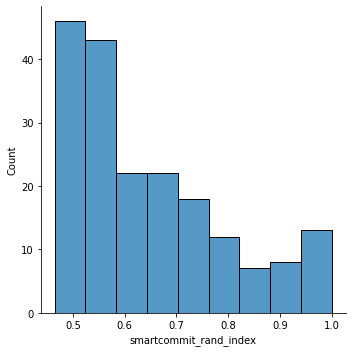

In [6]:
sns.displot(df, x="smartcommit_rand_index")

[Text(0.5, 1.0, 'Performance vs Lines')]

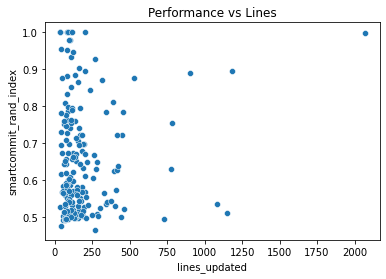

In [7]:
sns.scatterplot(df, x="lines_updated", y="smartcommit_rand_index").set(title="Performance vs Lines")

[Text(0.5, 1.0, 'Performance vs Files')]

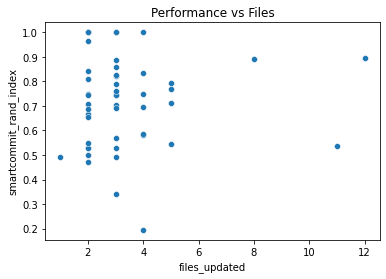

In [30]:
sns.scatterplot(df, x="files_updated", y="smartcommit_rand_index").set(title="Performance vs Files")

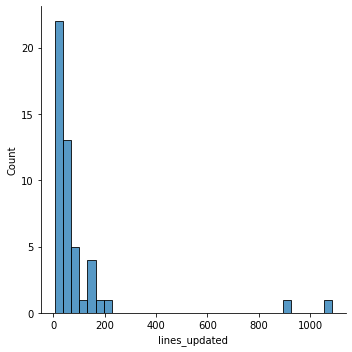

In [15]:
sns.displot(df, x="lines_updated")

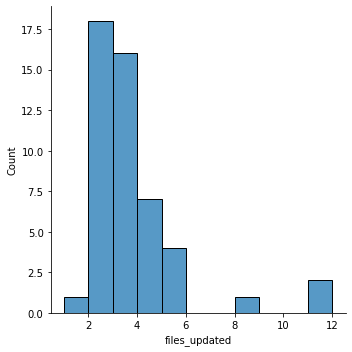

In [18]:
sns.displot(df, x="files_updated")

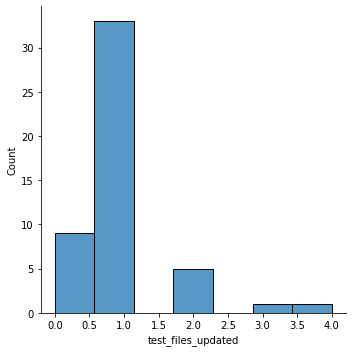

In [19]:
sns.displot(df, x="test_files_updated")

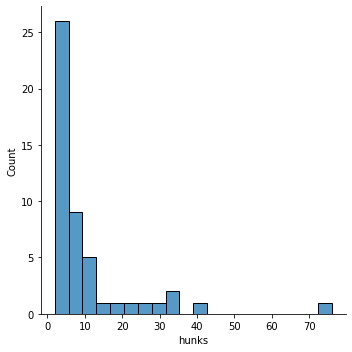

In [20]:
sns.displot(df, x="hunks")

<AxesSubplot: >

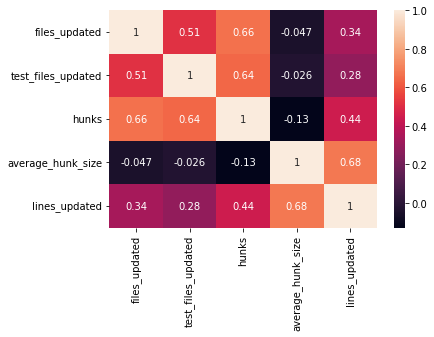

In [13]:
features = list(['files_updated', 'test_files_updated', 'hunks', 'average_hunk_size', 'lines_updated'])
correlation_matrix = df[features].corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

In [4]:
df_time = pd.read_csv("../out/time.csv", names=['project', 'bug_id', 'tool', 'time'])
df_time.head()

,project,bug_id,tool,time
0,Codec,10,smartcommit,1.477646
1,Time,8,smartcommit,2.027742
2,JacksonDatabind,108,smartcommit,2.528246
3,JacksonCore,4,smartcommit,1.744646
4,Closure,18,smartcommit,2.522351


In [8]:
df_time.groupby('tool').mean()

,bug_id,time
tool,,
smartcommit,44.28,2.388766


In [11]:
df.describe()

,bug_id,smartcommit_rand_index,files_updated,test_files_updated,hunks,average_hunk_size,lines_updated
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,44.930556,0.733668,3.361111,1.097222,9.472222,7.768721,73.027778
std,37.093079,0.173499,1.647068,0.734650,10.420689,6.533971,133.146110
min,1.000000,0.342277,2.000000,0.000000,2.000000,2.000000,6.000000
25%,15.500000,0.597536,2.000000,1.000000,4.000000,4.041667,22.750000
50%,35.000000,0.729231,3.000000,1.000000,6.500000,5.897321,40.500000
75%,70.000000,0.879958,4.000000,1.000000,10.000000,9.083333,79.000000
max,175.000000,1.000000,11.000000,4.000000,67.000000,40.750000,1084.000000


In [36]:
df.groupby('project')['project'].count()

project
Cli                 3
Closure            14
Codec               4
Compress            4
Csv                 3
Gson                2
JacksonCore         1
JacksonDatabind    11
Jsoup               7
Lang                7
Math                9
Mockito             5
Time                2
Name: project, dtype: int64

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
formula = 'smartcommit_rand_index ~ project+files_updated+test_files_updated+hunks+average_hunk_size+lines_updated'
model = smf.glm(formula = formula, data=df)
result = model.fit()
# pd.options.display.max_rows = 4000

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                    
==================================================================================
Dep. Variable:     smartcommit_rand_index   No. Observations:                   72
Model:                                GLM   Df Residuals:                       54
Model Family:                    Gaussian   Df Model:                           17
Link Function:                   identity   Scale:                        0.024398
Method:                              IRLS   Log-Likelihood:                 41.870
Date:                    Thu, 26 Jan 2023   Deviance:                       1.3175
Time:                            15:28:47   Pearson chi2:                     1.32
No. Iterations:                         3   Pseudo R-squ. (CS):             0.3961
Covariance Type:                nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.7057      0.117      6.007      0.000       0.475       0.936
project[T.Closure]            -0.0486      0.102     -0.475      0.635      -0.249       0.152
project[T.Codec]               0.0991      0.120      0.826      0.409      -0.136       0.334
project[T.Compress]            0.2025      0.122      1.664      0.096      -0.036       0.441
project[T.Csv]                 0.0229      0.130      0.176      0.861      -0.232       0.278
project[T.Gson]                0.0539      0.144      0.375      0.708      -0.228       0.336
project[T.JacksonCore]        -0.0574      0.183     -0.313      0.754      -0.417       0.302
project[T.JacksonDatabind]     0.1324      0.104      1.274      0.203      -0.071       0.336
project[T.Jsoup]               0.2487      0.116      2.150      0.032       0.022       0.475
project[T.Lang]                0.1148      0.110      1.044      0.296      -0.101       0.330
project[T.Math]                0.0981      0.106      0.924      0.355      -0.110       0.306
project[T.Mockito]            -0.0378      0.122     -0.311      0.756      -0.276       0.201
project[T.Time]                0.1883      0.150      1.253      0.210      -0.106       0.483
files_updated                 -0.0213      0.023     -0.943      0.346      -0.065       0.023
test_files_updated            -0.0033      0.032     -0.101      0.920      -0.067       0.060
hunks                         -0.0037      0.003     -1.314      0.189      -0.009       0.002
average_hunk_size              0.0077      0.004      2.001      0.045       0.000       0.015
lines_updated              -8.387e-06      0.000     -0.029      0.977      -0.001       0.001
==============================================================================================
"""